# Latihan 2: GMM dan GMM-EM

- Rafi Alvanzah - 2006528736
- Delfrin Adiyatma Situmeang - 2106759722
- Dexcel Oswald Otniel - 2106726932
- Laras Kirana Anindita - 2106653035
- Nadia Amelia Kirana - 2106653224

In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data Preparation

In [162]:
iris_data = pd.read_csv(r'Iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [163]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [164]:
iris_data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [165]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [179]:
iris_data_1 = iris_data.drop(columns=['Id','SepalLengthCm','SepalWidthCm','Species'])
iris_data_1.head()

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


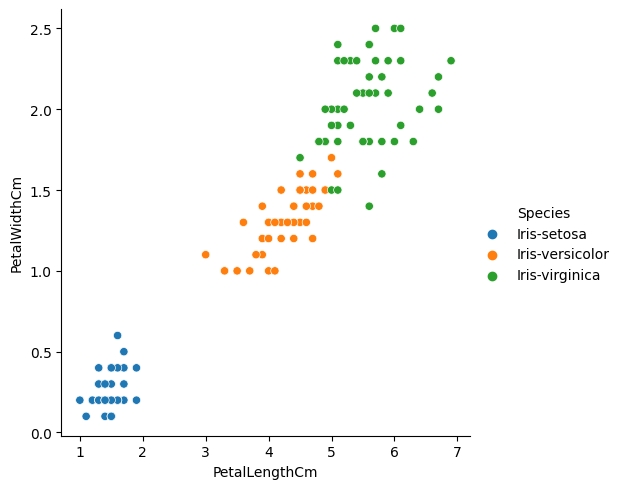

In [180]:
sns.relplot(kind='scatter', x=iris_data.PetalLengthCm, y=iris_data.PetalWidthCm, hue=iris_data.Species)
plt.show()

In [181]:
iris_data_2 = iris_data.drop(columns=['Id','PetalLengthCm','PetalWidthCm','Species'])
iris_data_2.head()

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


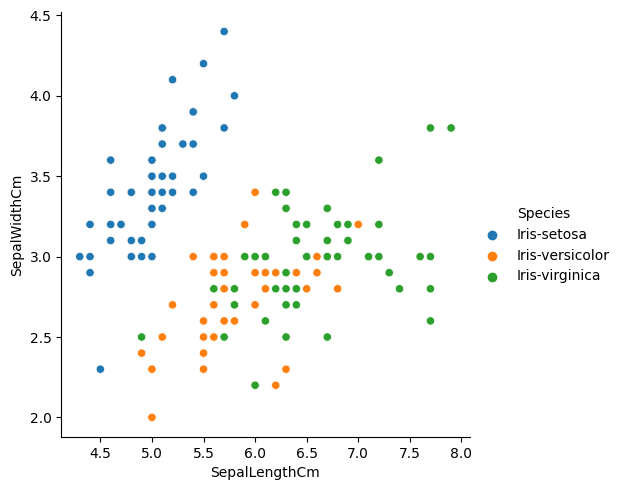

In [182]:
sns.relplot(kind='scatter', x=iris_data.SepalLengthCm, y=iris_data.SepalWidthCm, hue=iris_data.Species)
plt.show()

# Cobalah lakukan pengelompokan pada data 2d: a. PetalLenght vs Petal witdh b. SepalLenght vs Sepal width

## K-Means Clustering

In [170]:
from sklearn.cluster import KMeans

### PetalLenght vs PetalWitdh

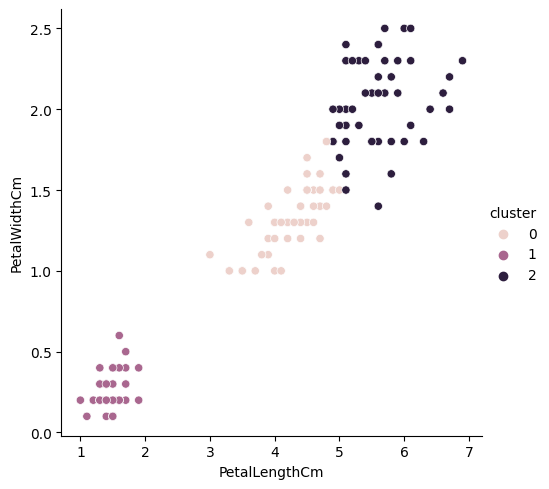

In [171]:
#training k-means model
kmeans = KMeans(n_clusters=3)
kmeans.fit(iris_data_1)

#predictions from k-means
pred = kmeans.predict(iris_data_1)
frame_1 = iris_data_1.copy()
frame_1['cluster'] = pred

#plotting results
sns.relplot(kind='scatter', x=frame_1.PetalLengthCm, y=frame_1.PetalWidthCm, hue=frame_1.cluster)
plt.show()

### SepalLenght vs SepalWidth

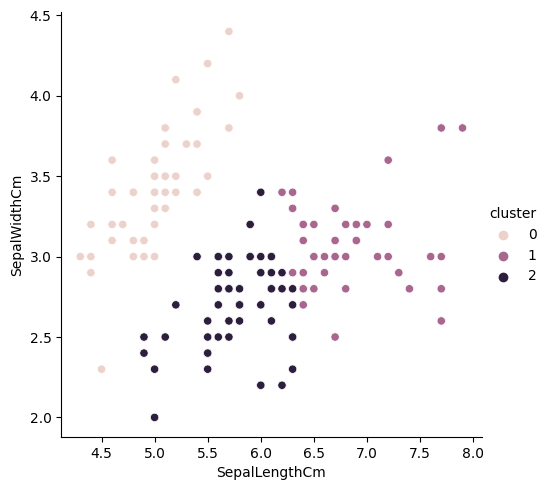

In [172]:
#training k-means model
kmeans = KMeans(n_clusters=3)
kmeans.fit(iris_data_2)

#predictions from k-means
pred = kmeans.predict(iris_data_2)
frame_2 = iris_data_2.copy()
frame_2['cluster'] = pred

#plotting results
sns.relplot(kind='scatter', x=frame_2.SepalLengthCm, y=frame_2.SepalWidthCm, hue=frame_2.cluster)
plt.show()

## Gaussian Mixture Model

In [173]:
from sklearn.mixture import GaussianMixture

### PetalLenght vs PetalWitdh

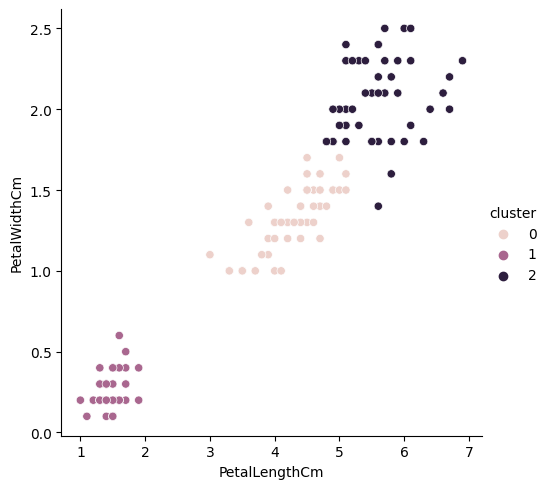

In [174]:
#training gaussian mixture model
gmm = GaussianMixture(n_components=3)
gmm.fit(iris_data_1)

#predictions from gmm
labels = gmm.predict(iris_data_1)
frame_3 = iris_data_1.copy()
frame_3['cluster'] = labels

#plotting results
sns.relplot(kind='scatter', x=frame_3.PetalLengthCm, y=frame_3.PetalWidthCm, hue=frame_3.cluster)
plt.show()

### SepalLenght vs SepalWidth

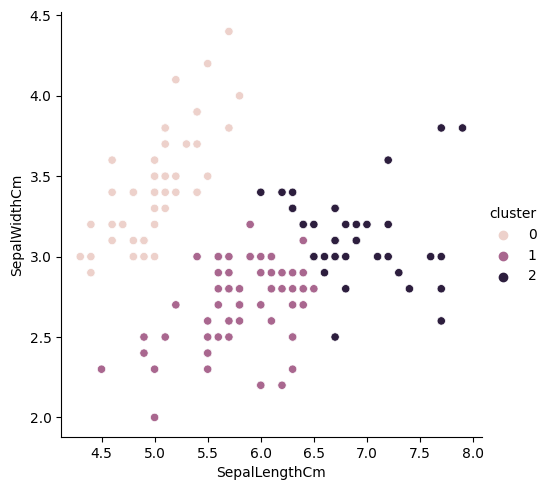

In [175]:
#training gaussian mixture model
gmm = GaussianMixture(n_components=3)
gmm.fit(iris_data_2)

#predictions from gmm
labels = gmm.predict(iris_data_2)
frame_4 = iris_data_2.copy()
frame_4['cluster'] = labels

#plotting results
sns.relplot(kind='scatter', x=frame_4.SepalLengthCm, y=frame_4.SepalWidthCm, hue=frame_4.cluster)
plt.show()

## GMM Menggunakan  EM

In [209]:
from sklearn import datasets
iris = datasets.load_iris()

In [210]:
colors = ['navy', 'turquoise', 'darkorange']
markers = ['+','*','x']

#Untuk memvisualisasi covariansi GMM
from matplotlib.patches import Ellipse
def plot_cov_ellipse(cov, pos, col='b', nstd=2, ax=None, **kwargs):
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]
    if ax is None:
        ax = plt.gca()
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, color=col, alpha=0.2,**kwargs)
    ax.add_artist(ellip)
    return ellip

### PetalLenght vs PetalWitdh

In [218]:
#Contoh Pendekatan GMM dengan EM
# Contoh Mencoba GMM dengan jenis covarians yang berbeda pada data 2d
estimators = dict((cov_type, GaussianMixture(n_components=3,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(iris.data[:,2:4]) ## fits mixture model menggunakan EM

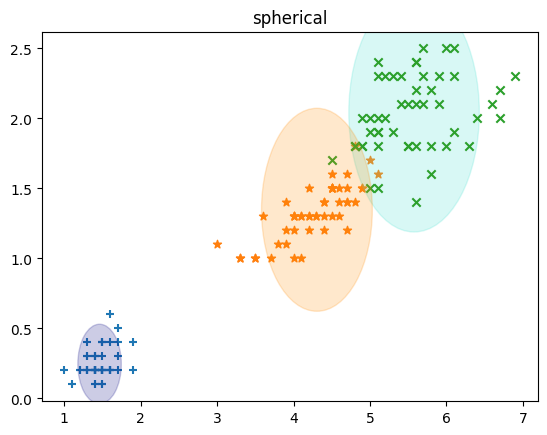

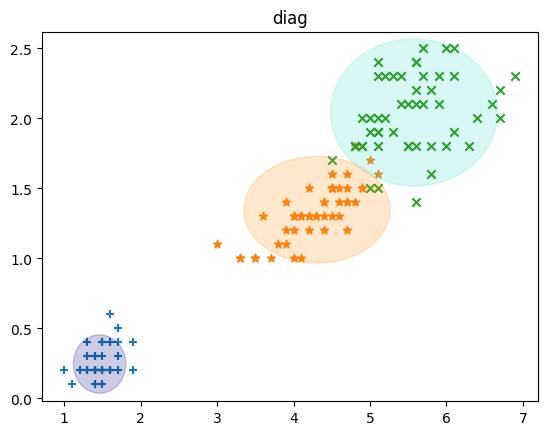

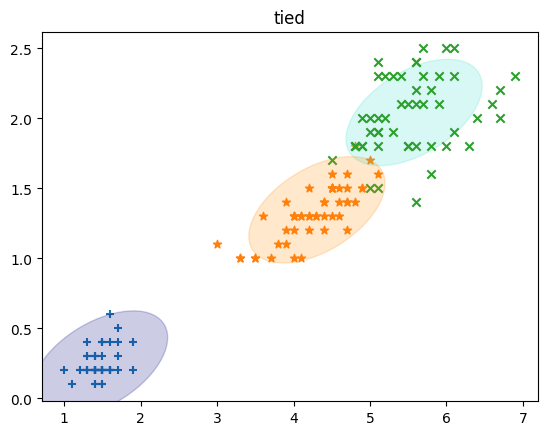

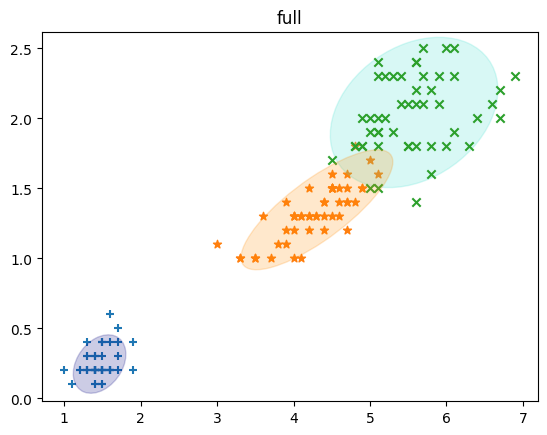

In [225]:
#Contoh Code Visualisasi GMM dengan EM dan tipe covariansi yang berbeda
for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 2], data[:, 3], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title(name)
    plt.show()

### SepalLenght vs SepalWidth

In [236]:
#Contoh Pendekatan GMM dengan EM
# Contoh Mencoba GMM dengan jenis covarians yang berbeda pada data 2d
estimators = dict((cov_type, GaussianMixture(n_components=3,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(iris.data[:,0:2]) ## fits mixture model menggunakan EM

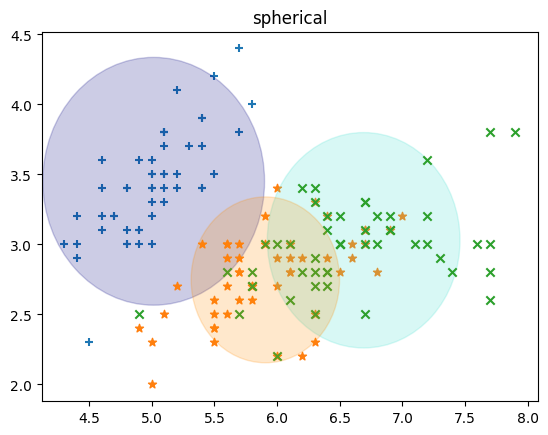

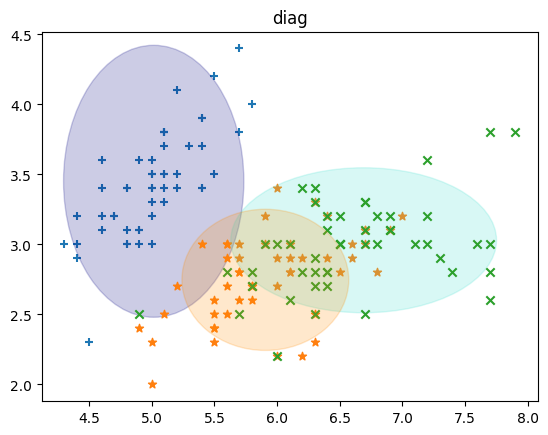

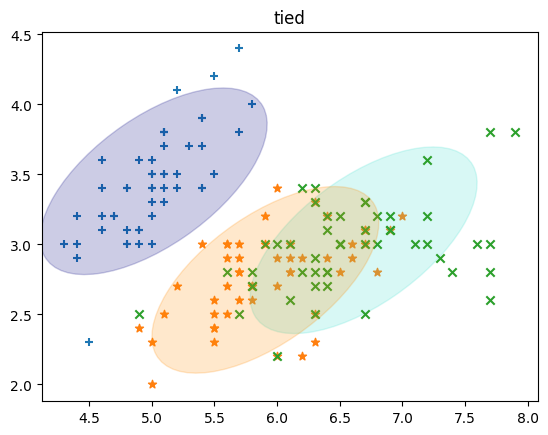

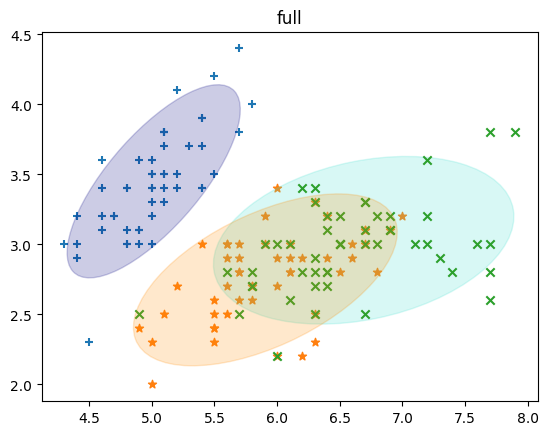

In [237]:
#Contoh Code Visualisasi GMM dengan EM dan tipe covariansi yang berbeda
for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title(name)
    plt.show()

# Prediksi cluster untuk setiap titik data untuk pendekatan K-Means Clustering dan GMM pada ke dua data 2D di atas. Analisalah hasil perbandingan dari K-Means Clustering dan GMM Clustering.

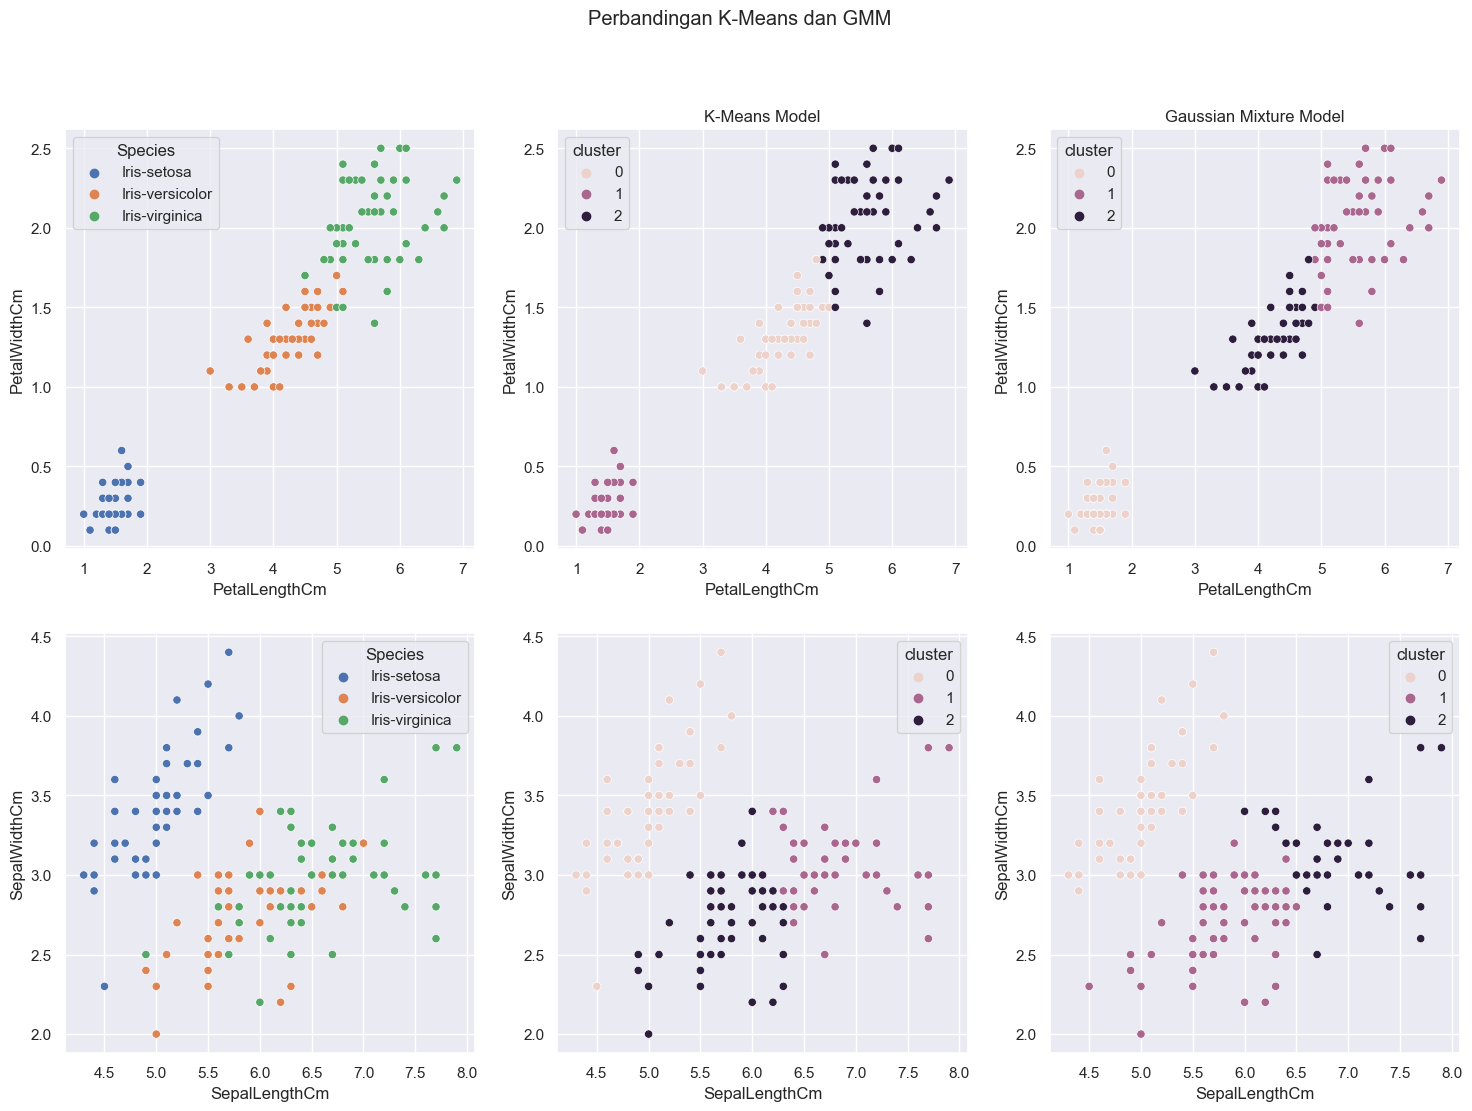

In [271]:
fig, axes = plt.subplots(2, 3, figsize=(18,12))
fig.suptitle('Perbandingan K-Means dan GMM')

sns.scatterplot(x=iris_data.PetalLengthCm, y=iris_data.PetalWidthCm, hue=iris_data.Species, ax=axes[0,0])
axes[0,0].set_title("")

sns.scatterplot(x=frame_1.PetalLengthCm, y=frame_1.PetalWidthCm, hue=frame_1.cluster, ax=axes[0,1])
axes[0,1].set_title("K-Means Model")

sns.scatterplot(x=frame_3.PetalLengthCm, y=frame_3.PetalWidthCm, hue=frame_3.cluster, ax=axes[0,2])
axes[0,2].set_title("Gaussian Mixture Model")

sns.scatterplot(x=iris_data.SepalLengthCm, y=iris_data.SepalWidthCm, hue=iris_data.Species, ax=axes[1,0])

sns.scatterplot(x=frame_2.SepalLengthCm, y=frame_2.SepalWidthCm, hue=frame_2.cluster, ax=axes[1,1])

sns.scatterplot(x=frame_4.SepalLengthCm, y=frame_4.SepalWidthCm, hue=frame_4.cluster, ax=axes[1,2])

plt.show()


- Cluster dari K-Means memiliki bentuk melingkar hal ini terjadi karena centroid dari cluster diperbarui secara iteratif menggunakan nilai rata-rata (model berbasis jarak). Sedangkan, Gaussian Mixture Model merupakan sebuah model probabilistik yang menggunakan soft-clustering untuk mendistribusikan titik-titik di cluster yang berbeda.
- Jadi kesimpulannya, Jika K-means (Model berbasis jarak) gagal mengidentifikasi
cluster degan tepat, tentunya dibutuhkan cara yang berbeda untuk
menetapkan cluster bagi setiap titik data,  sehingga  kita juga bisa menggunakan  model berbasis distribusi yakni Gaussian mixture models. Begitupun sebaliknya.